# Knickpoints & Landslides

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from math import ceil
import rasterio as rio
import matplotlib

## Q. La Iguana (cluster C)

In [2]:
#drainage network and landslide location
df1 = pd.read_csv('G:/My Drive/INVESTIGACION/POSDOC/TopoToolbox/subcuencas/iguana_12m_network.csv')
df1.sort_values(by='distance', inplace=True)
df1.head(2)

,distance,elevation,Lrec_d,Lrec_h,Lreld,Lrelh
329649,0.0,1486.006592,NaN,NaN,NaN,NaN
329646,12.5,1487.000000,NaN,NaN,NaN,NaN


In [3]:
#main drinage and hypsometric index
df3 = pd.read_csv('G:/My Drive/INVESTIGACION/POSDOC/TopoToolbox/subcuencas/iguana_12m_main.csv')
df3.sort_values(by='distance', inplace=True)
df3.head(2)

,distance,elevation,gradient,hypso
1136,0.00000,1486.006592,0.000000,0.431922
1135,17.67767,1487.000000,0.056196,0.431610


In [4]:
#knickpoints
df5 = pd.read_csv('G:/My Drive/INVESTIGACION/POSDOC/TopoToolbox/subcuencas/iguana_12m_knicpoint.csv')
df5.head(2)

,x,y,z,dz,distance


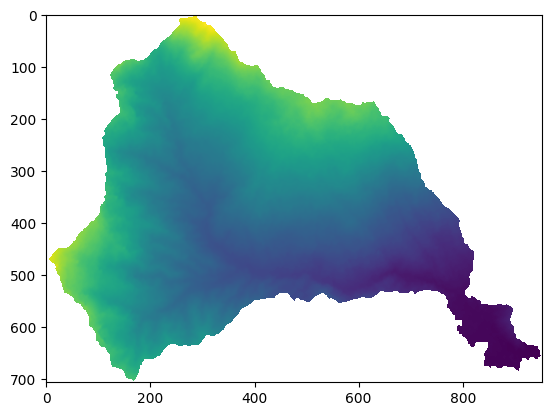

In [5]:
raster = rio.open('G:/My Drive/INVESTIGACION/POSDOC/Nechi/Subcuencas/Aburra/Raster/iguana_12m.tif')
alt=raster.read(1)
alt=np.where(alt==-99999.,np.nan,alt)
alt_vector=alt.ravel()  # para pasarlo a un vector
plt.imshow(alt)

In [37]:
dx=(np.nanmax(alt_vector)-np.nanmin(alt_vector))/99
sorted_df = np.sort(alt_vector)
alt ={}
total=0
for x in sorted_df:
    if (pd.isna(x)):
        continue
    total+=1
    k = ceil(x+1)//dx
    alt.setdefault(k, []).append(x)
b = list(alt.values())

# calculate the mean, max, min, frequency
alt_mean=[]
alt_freq=[]
for x in range(len(b)):
  alt_mean.append(np.mean(b[x]))
  alt_freq.append(len(b[x]))

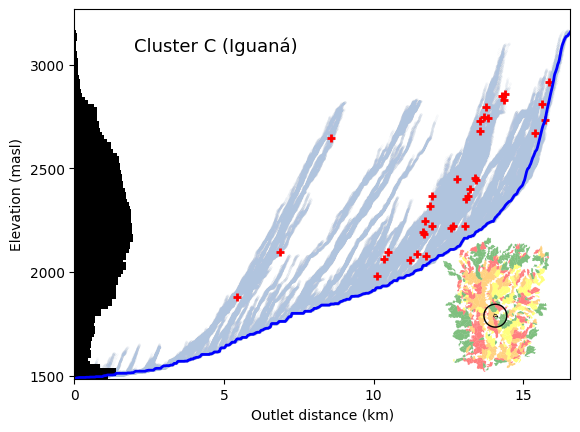

In [38]:
f, ax = plt.subplots()
ax.scatter(df1.distance/1000,df1.elevation,marker='.',s=0.02,c='lightsteelblue',alpha=0.6) # drinage network
ax.scatter(df1.Lrec_d/1000,df1.Lrec_h,marker="+",linewidth=2,c='red',s=30,alpha=1,label='Recent landslides') # landslides
ax.scatter(df1.Lreld/1000,df1.Lrelh,marker=".",linewidth=2,c='black',s=30,alpha=1,label='Relict landslides') # landslides

frequency=[100*x/(total) for x in alt_freq]
ax.barh(alt_mean,frequency, height=40,color='black',label='Elevation frequency')

ax.plot(df3.distance/1000,df3.elevation,color='blue',linewidth=2,linestyle='-',label='Drainage network') #main drainage
#ax.scatter(df5.distance/1000,df5.z,marker='o',c='orange',s=df5.dz*2,alpha=1,label='Knickpoints'); # knickpoints

axin=ax.inset_axes([0.65,0.0,0.4,0.4])
color_discrete_map={"A": "green","B": "orange","C": "red","D": "yellow",}
cluster=gpd.read_file("G:/My Drive/INVESTIGACION/POSDOC/Data/Vector/catchment_cluster.gpkg")
cmap = matplotlib.colors.ListedColormap([color_discrete_map[b] for b in cluster.kmeans.unique()])
cluster.plot(ax=axin,column='kmeans',cmap=cmap,linewidth=0.2,alpha=0.5)
cat=gpd.read_file("G:/My Drive/INVESTIGACION/POSDOC/Nechi/Subcuencas/Aburra/Vector/iguana_12m.shp")
cat.plot(ax=axin,facecolor='none',linewidth=0.3)
point=cat.centroid.buffer(30000)
point.plot(ax=axin,facecolor='none',linewidth=1)
axin.set_axis_off()

ax.set_xlabel('Outlet distance (km)')
ax.set_ylabel('Elevation (masl)')
ax.set_yticks(np.arange(0,max(df3.elevation)+600,500))
ax.set_xticks(np.arange(0,max(df3.distance/1000),5))
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelsize=10)
ax.set_ylim(min(df3.elevation),max(df1.elevation)+100)
ax.set_xlim(0,max(df3.distance/1000))
#ax.legend(ncol=1, loc="lower right",prop={'size': 10},frameon=False)
ax.text(min(df3.distance/1000)+2,max(df1.elevation)-100,'Cluster C (Iguaná)',size=13);

plt.savefig("G:/My Drive/INVESTIGACION/POSDOC/Figuras/iguana_12m_knickpoints.png", dpi=500)

## Q. Dona Maria (cluster B)

In [3]:
#drainage network and landslide location
df1 = pd.read_csv('G:/My Drive/INVESTIGACION/POSDOC/TopoToolbox/subcuencas/donaMaria_12m_network.csv')
df1.sort_values(by='distance', inplace=True)
df1.head(2)

,distance,elevation,Lrec_d,Lrec_h,Lreld,Lrelh
471048,0.0,1560.009155,NaN,NaN,NaN,NaN
471038,12.5,1560.011353,NaN,NaN,NaN,NaN


In [4]:
#main drinage and hypsometric index
df3 = pd.read_csv('G:/My Drive/INVESTIGACION/POSDOC/TopoToolbox/subcuencas/donaMaria_12m_main.csv')
df3.sort_values(by='distance', inplace=True)
df3.head(2)

,distance,elevation,gradient,hypso
1491,0.00000,1560.009155,0.000000,0.387581
1490,17.67767,1560.012207,0.000173,0.387600


In [5]:
#knickpoints
df5 = pd.read_excel('G:/My Drive/INVESTIGACION/POSDOC/TopoToolbox/subcuencas/donamaria_12m.xlsx','Sheet5')
df5.head(2)

,x,y,z,dz,distance
0,424850.0625,692806.875,2639,66.722185,19975.751250
1,424662.5625,693406.875,2825,45.818082,20688.771632


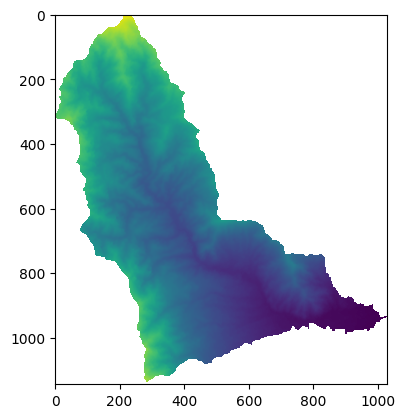

In [6]:
raster = rio.open('G:/My Drive/INVESTIGACION/POSDOC/Nechi/Subcuencas/Aburra/Raster/donaMaria_12m.tif')
alt=raster.read(1)
alt=np.where(alt==-99999.,np.nan,alt)
alt_vector=alt.ravel()  # para pasarlo a un vector
plt.imshow(alt)

In [7]:
dx=(np.nanmax(alt_vector)-np.nanmin(alt_vector))/99
sorted_df = np.sort(alt_vector)
alt ={}
total=0
for x in sorted_df:
    if (pd.isna(x)):
        continue
    total+=1
    k = ceil(x+1)//dx
    alt.setdefault(k, []).append(x)
b = list(alt.values())

# calculate the mean, max, min, frequency
alt_mean=[]
alt_freq=[]
for x in range(len(b)):
  alt_mean.append(np.mean(b[x]))
  alt_freq.append(len(b[x]))

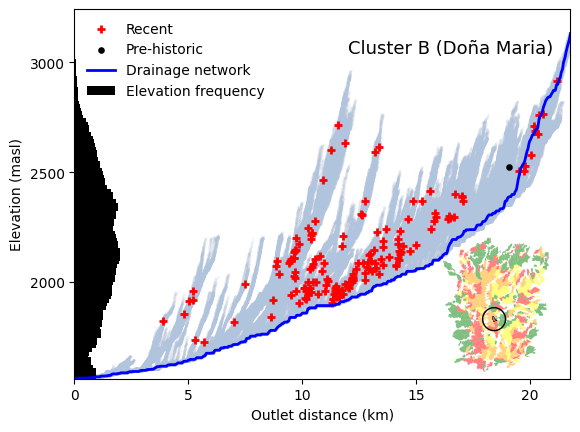

In [9]:
f, ax = plt.subplots()
ax.scatter(df1.distance/1000,df1.elevation,marker='.',s=0.02,c='lightsteelblue',alpha=0.6) # drinage network
ax.scatter(df1.Lrec_d/1000,df1.Lrec_h,marker="+",linewidth=2,c='red',s=30,alpha=1,label='Recent') # landslides
ax.scatter(df1.Lreld/1000,df1.Lrelh,marker=".",linewidth=2,c='black',s=30,alpha=1,label='Pre-historic') # landslides

frequency=[100*x/(total) for x in alt_freq]
ax.barh(alt_mean,frequency, height=40,color='black',label='Elevation frequency')

ax.plot(df3.distance/1000,df3.elevation,color='blue',linewidth=2,linestyle='-',label='Drainage network') #main drainage
#ax.scatter(df5.distance/1000,df5.z,marker='o',c='orange',s=df5.dz*2,alpha=1,label='Knickpoints'); # knickpoints

axin=ax.inset_axes([0.65,0.0,0.4,0.4])
color_discrete_map={"A": "green","B": "orange","C": "red","D": "yellow",}
cluster=gpd.read_file("G:/My Drive/INVESTIGACION/POSDOC/Data/Vector/catchment_cluster.gpkg")
cmap = matplotlib.colors.ListedColormap([color_discrete_map[b] for b in cluster.kmeans.unique()])
cluster.plot(ax=axin,column='kmeans',cmap=cmap,linewidth=0.2,alpha=0.5)
cat=gpd.read_file("G:/My Drive/INVESTIGACION/POSDOC/Nechi/Subcuencas/Aburra/Vector/donaMaria_12m.shp")
cat.plot(ax=axin,facecolor='none',linewidth=0.3)
point=cat.centroid.buffer(30000)
point.plot(ax=axin,facecolor='none',linewidth=1)
axin.set_axis_off()

ax.set_xlabel('Outlet distance (km)')
ax.set_ylabel('Elevation (masl)')
ax.set_yticks(np.arange(0,max(df3.elevation)+600,500))
ax.set_xticks(np.arange(0,max(df3.distance/1000),5))
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelsize=10)
ax.set_ylim(min(df3.elevation),max(df1.elevation)+100)
ax.set_xlim(0,max(df3.distance/1000))
ax.legend(ncol=1, loc="upper left",prop={'size': 10},frameon=False)
ax.text(12,max(df1.elevation)-100,'Cluster B (Doña Maria)',size=13);

plt.savefig("G:/My Drive/INVESTIGACION/POSDOC/Figuras/donaMaria_12m_knickpoints.png", dpi=500)

### Rio Negro (Cluster A)

In [12]:
#drainage network and landslide location
df1 = pd.read_csv('G:/My Drive/INVESTIGACION/POSDOC/TopoToolbox/subcuencas/rionegro_network.csv')
df1.sort_values(by='distance', inplace=True)
df1.head(2)

,distance,elevation,Lrec_d,Lrec_h
1913418,0.0,2127.0,NaN,NaN
871787,0.0,2415.0,NaN,NaN


In [14]:
#main drinage and hypsometric index
df3 = pd.read_csv('G:/My Drive/INVESTIGACION/POSDOC/TopoToolbox/subcuencas/rionegro_12m_main.csv')
df3.sort_values(by='distance', inplace=True)
df3.head(2)

,distance,elevation,gradient,hypso
2569,0.0,2114.612793,0.000000,0.253136
2568,12.5,2114.614990,0.000176,0.253179


In [9]:
#knickpoints
df5 = pd.read_excel('G:/My Drive/INVESTIGACION/POSDOC/TopoToolbox/subcuencas/donamaria_12m.xlsx','Sheet5')
df5.head(2)

,x,y,z,dz,distance
0,424850.0625,692806.875,2639,66.722185,19975.751250
1,424662.5625,693406.875,2825,45.818082,20688.771632


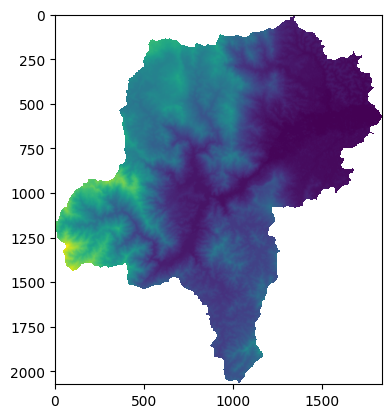

In [15]:
raster = rio.open('G:/My Drive/INVESTIGACION/POSDOC/Nare/Raster/rionegro.tif')
alt=raster.read(1)
alt=np.where(alt==-99999.,np.nan,alt)
alt_vector=alt.ravel()  # para pasarlo a un vector
plt.imshow(alt)

In [16]:
dx=(np.nanmax(alt_vector)-np.nanmin(alt_vector))/99
sorted_df = np.sort(alt_vector)
alt ={}
total=0
for x in sorted_df:
    if (pd.isna(x)):
        continue
    total+=1
    k = ceil(x+1)//dx
    alt.setdefault(k, []).append(x)
b = list(alt.values())

# calculate the mean, max, min, frequency
alt_mean=[]
alt_freq=[]
for x in range(len(b)):
  alt_mean.append(np.mean(b[x]))
  alt_freq.append(len(b[x]))

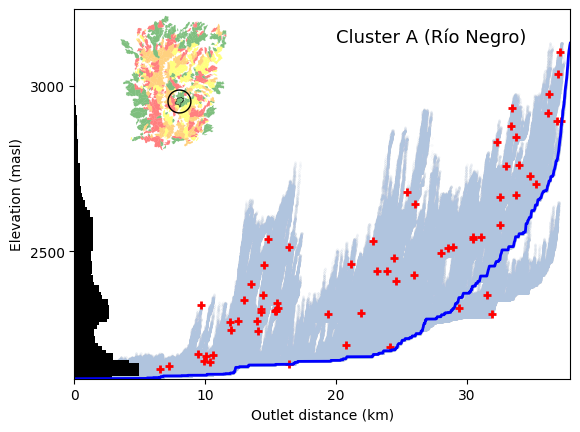

In [27]:
f, ax = plt.subplots()
ax.scatter(df1.distance/1000,df1.elevation,marker='.',s=0.02,c='lightsteelblue',alpha=0.6) # drinage network
ax.scatter(df1.Lrec_d/1000,df1.Lrec_h,marker="+",linewidth=2,c='red',s=30,alpha=1,label='Recent landslides') # landslides
#ax.scatter(df1.Lreld/1000,df1.Lrelh,marker=".",linewidth=2,c='black',s=30,alpha=1,label='Relict landslides') # landslides

frequency=[100*x/(total) for x in alt_freq]
ax.barh(alt_mean,frequency, height=40,color='black',label='Elevation frequency')

ax.plot(df3.distance/1000,df3.elevation,color='blue',linewidth=2,linestyle='-',label='Drainage network') #main drainage
#ax.scatter(df5.distance/1000,df5.z,marker='o',c='orange',s=df5.dz*2,alpha=1,label='Knickpoints'); # knickpoints

axin=ax.inset_axes([0.0,0.6,0.4,0.4])
color_discrete_map={"A": "green","B": "orange","C": "red","D": "yellow",}
cluster=gpd.read_file("G:/My Drive/INVESTIGACION/POSDOC/Data/Vector/catchment_cluster.gpkg")
cmap = matplotlib.colors.ListedColormap([color_discrete_map[b] for b in cluster.kmeans.unique()])
cluster.plot(ax=axin,column='kmeans',cmap=cmap,linewidth=0.2,alpha=0.5)
cat=gpd.read_file("G:/My Drive/INVESTIGACION/POSDOC/Nare/Vector/rionegro.gpkg")
cat.plot(ax=axin,facecolor='none',linewidth=0.3)
point=cat.centroid.buffer(30000)
point.plot(ax=axin,facecolor='none',linewidth=1)
axin.set_axis_off()

ax.set_xlabel('Outlet distance (km)')
ax.set_ylabel('Elevation (masl)')
ax.set_yticks(np.arange(0,max(df3.elevation)+600,500))
ax.set_xticks(np.arange(0,max(df3.distance/1000),10))
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelsize=10)
ax.set_ylim(min(df3.elevation),max(df1.elevation)+100)
ax.set_xlim(0,max(df3.distance/1000))
#ax.legend(ncol=1, loc="lower right",prop={'size': 10},frameon=False)
ax.text(20,max(df1.elevation),'Cluster A (Río Negro)',size=13);

plt.savefig("G:/My Drive/INVESTIGACION/POSDOC/Figuras/rionegro_12m_knickpoints.png", dpi=500)

### Q. La Garcia (Cluster D)

In [74]:
#drainage network and landslide location
df1 = pd.read_csv('G:/My Drive/INVESTIGACION/POSDOC/TopoToolbox/subcuencas/garcia_12m_network.csv')
df1.sort_values(by='distance', inplace=True)
df1.head(2)

,distance,elevation,Lrecd,Lrech,Lreld,Lrelh
492713,0.0,1462.0,NaN,NaN,NaN,NaN
52249,0.0,3130.0,NaN,NaN,NaN,NaN


In [75]:
#main drinage and hypsometric index
df3 = pd.read_csv('G:/My Drive/INVESTIGACION/POSDOC/TopoToolbox/subcuencas/garcia_12m_main.csv')
df3.sort_values(by='distance', inplace=True)
df3.head(2)

,distance,elevation,gradient,hypso
1174,0.0,1448.041870,0.000000,0.549209
1173,12.5,1448.044067,0.000176,0.549451


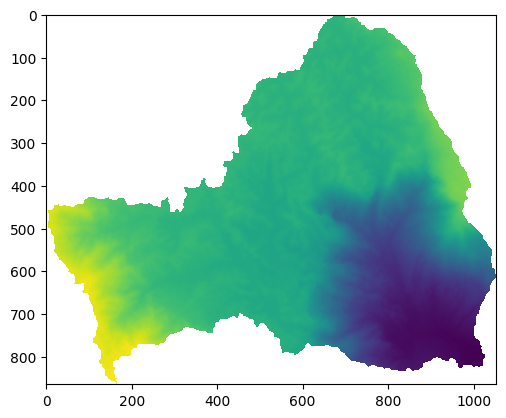

In [76]:
raster = rio.open('G:/My Drive/INVESTIGACION/POSDOC/Nechi/Subcuencas/Aburra/Raster/garcia2_12m.tif')
alt=raster.read(1)
alt=np.where(alt==-99999.,np.nan,alt)
alt_vector=alt.ravel()  # para pasarlo a un vector
plt.imshow(alt)

In [77]:
dx=(alt_vector.max()-alt_vector.min())/99
sorted_df = np.sort(alt_vector)
alt ={}
total=0
for x in sorted_df:
    if (pd.isna(x)):
        continue
    total+=1
    k = ceil(x+1)//dx
    alt.setdefault(k, []).append(x)
b = list(alt.values())

# calculate the mean, max, min, frequency
alt_mean=[]
alt_freq=[]
for x in range(len(b)):
  alt_mean.append(np.mean(b[x]))
  alt_freq.append(len(b[x]))

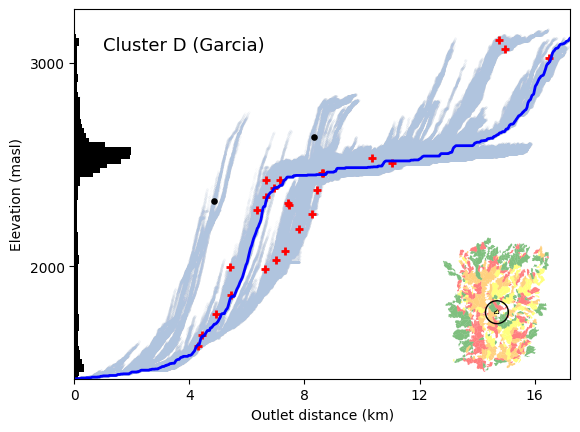

In [82]:
f, ax = plt.subplots()
ax.scatter(df1.distance/1000,df1.elevation,marker='.',s=0.02,c='lightsteelblue',alpha=0.6) # drinage network
ax.scatter(df1.Lrecd/1000,df1.Lrech,marker="+",linewidth=2,c='red',s=30,alpha=1,label='Recent landslides') # landslides
ax.scatter(df1.Lreld/1000,df1.Lrelh,marker=".",linewidth=2,c='black',s=30,alpha=1,label='Relict landslides') # landslides

frequency=[20*x/(total) for x in alt_freq]
ax.barh(alt_mean,frequency, height=40,color='black',label='Elevation frequency')

ax.plot(df3.distance/1000,df3.elevation,color='blue',linewidth=2,linestyle='-',label='Drainage network') #main drainage
#ax.scatter(df5.distance/1000,df5.z,marker='o',c='orange',s=df5.dz*2,alpha=1,label='Knickpoints'); # knickpoints

axin=ax.inset_axes([0.65,0.0,0.4,0.4])
color_discrete_map={"A": "green","B": "orange","C": "red","D": "yellow",}
cluster=gpd.read_file("G:/My Drive/INVESTIGACION/POSDOC/Data/Vector/catchment_cluster.gpkg")
cmap = matplotlib.colors.ListedColormap([color_discrete_map[b] for b in cluster.kmeans.unique()])
cluster.plot(ax=axin,column='kmeans',cmap=cmap,linewidth=0.2,alpha=0.5)
cat=gpd.read_file("G:/My Drive/INVESTIGACION/POSDOC/Nechi/Subcuencas/Aburra/Vector/garcia_12m.shp")
cat.plot(ax=axin,facecolor='none',linewidth=0.3)
point=cat.centroid.buffer(30000)
point.plot(ax=axin,facecolor='none',linewidth=1)
axin.set_axis_off()

ax.set_xlabel('Outlet distance (km)')
ax.set_ylabel('Elevation (masl)')
ax.set_yticks(np.arange(0,max(df3.elevation)+600,1000))
ax.set_xticks(np.arange(0,max(df3.distance/1000),4))
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelsize=10)
ax.set_ylim(min(df3.elevation),max(df1.elevation)+100)
ax.set_xlim(0,max(df3.distance/1000))
#ax.legend(ncol=1, loc="lower right",prop={'size': 10},frameon=False)
ax.text(min(df3.distance/1000)+1,max(df1.elevation)-100,'Cluster D (Garcia)',size=13);

plt.savefig("G:/My Drive/INVESTIGACION/POSDOC/Figuras/garcia_12m_knickpoints.png", dpi=500)